In [1]:
##################################################################################################################
# 
#   Linear Regression für einen Datensatz und mit einem GradientDescentOptimizer von pennylane
#
#   Author: Philip Bramwell
#   Datum: 12 November
#   Version: 1.0.0
# 
#   Datensatz: real estate
#   link: https://www.kaggle.com/quantbruce/real-estate-price-prediction
#
#   LIB:
#       pennylane: https://pennylane.ai
#       pandas: https://pandas.pydata.org
#       matplotlib: https://matplotlib.org
#       numpy: https://pennylane.readthedocs.io/en/stable/introduction/interfaces/numpy.html
#
#   Ziel: 
#         * Einen linearen Zusammenhang zwischen unabhängigen Variablen und einer abhängigen Variablen 
#           eines Datensatzes zu finden
#         * linearen Zusammenhang visuell darstellen
#
#   Github: https://github.com/philBram/quantum
#   Documents: https://discuss.pennylane.ai/t/performing-linear-or-non-linear-regression-with-pennylane/31
#
#   Index: 
#         1. benötigte LIBs importieren
#         2. Datensatz laden
#         3. Variablen definieren
#         4. Funktionen definieren
#         5. Daten in einem Zwischenschritt visualisieren, um eine eventuelle lineare Korrelation festzustellen
#         6. Daten transformieren, um einen besseren linearen Zusammenhang herzustellen
#         7. Steigung und Ordinatenabschnitt der Regressionsgeraden optimieren
#         8. finale Daten und die optimierte Regressionsgerade visualisieren 
#
##################################################################################################################

# Imports

In [2]:
import pennylane as qml
import pandas as pd
import matplotlib.pyplot as plt
from pennylane import numpy as np

# Datensatz

In [3]:
##################################################################################################################
#
#    Datensatz real_estate über pandas einlesen 
#    Link: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
#
##################################################################################################################

dataset_csv = pd.read_csv("real_estate.csv")

# Variablen

In [4]:
##################################################################################################################
#
#    unabhängige Variablen, die auf lineare Korrelation getestet werden sollen
#    mit .values erstellt man ein numpy array für die jeweils angegebene Spalte des Datensatzes
#
#    @Param:
#            X2 house age: Alter des Hause [ float ]
#            X3 distance to the nearest MRT station: Entfernung zu der nächsten MRT Station [ float ]
#            X4 number of convenience stores: Anzahl der sich in der nähe befindlichen Supermärkte [ int ]
#
##################################################################################################################

house_age = dataset_csv["X2 house age"].values
distance_mrt_station = dataset_csv["X3 distance to the nearest MRT station"].values
number_convenience_stores = dataset_csv["X4 number of convenience stores"].values

##################################################################################################################
#
#    abhängige Variable für die lineare Regression
#    
#    @Param:
#            Y house price of unit area: Hausepreis [ float ]
#            
##################################################################################################################

house_prices = dataset_csv["Y house price of unit area"].values

##################################################################################################################
#
#    array mit Steigung an Position 0 und Ordinatenabschnitt an Position 1
#    Diese Werte werden für die Optimierung der Regressionsgeraden verwendet
#
##################################################################################################################

funktions_gewichte = [0.0, 0.0]

##################################################################################################################
#
#    GradientDescentOptimizer mit einer Schrittweite von 0.01 ist für die Optimierung und Anpassung
#    der funktions_gewichte zuständig
#    Link: https://pennylane.readthedocs.io/en/stable/code/api/pennylane.GradientDescentOptimizer.html 
#
##################################################################################################################

optimization = qml.GradientDescentOptimizer(0.01)

# Anzahl der Schritte, für die die Optimierung durchgeführt wird

optimization_steps = 10000

# Funktionen

In [5]:
##################################################################################################################
#
#   @name   house_prices_vorhersage
#   @brief   berechnet den y-wert der Regressionsgeraden
#   @Param   
#          funktions_gewichte: Steigung und Ordinatenabschnitt für die Regressionsgerade
#
#   @Returnvalue
#          ermittelter y-wert der linearen Regression
#
##################################################################################################################

def house_prices_vorhersage(funktions_gewichte):
    return funktions_gewichte[0] * distance_mrt_station + funktions_gewichte[1]

##################################################################################################################
#
#   @ame   kosten_funktion
#   @brief   berechnet die mittlere quadratische Abweichung in Abhängigkeit zu den ermittelten 
#            y-Werten und den tatsächlichen Werten
#   @Param   
#          funktions_gewichte: Steigung und Ordinatenabschnitt für die Regressionsgerade
#
#   @Returnvalue
#          ermittelter mean square error
#
##################################################################################################################

def kosten_funktion(funktions_gewichte):
    house_prices_vorhersage_tmp = house_prices_vorhersage(funktions_gewichte)
    mean_square_error = np.mean((house_prices - house_prices_vorhersage_tmp) ** 2)
    return mean_square_error

##################################################################################################################
#
#   @name   korrelationskoeffizient
#   @brief   berechnet den Korrelationskoeffizient für die unabhängigen und abhängigen Werte, 
#            für die jeweiligen Spalten des Datensatzes
#
#   @Param
#          x: Werte für die unabhängige Variable
#          y: Werte für die abhängige Variablen
#
#   @Returnvalue
#          ermittelter Korrelationskoeffizient
#
##################################################################################################################

def korrelationskoeffizient(x, y):
    sum_x_y = np.sum((x - np.mean(x)) * (y - np.mean(y)))
    sum_x_pow = np.sum(np.power(x - np.mean(x), 2))
    sum_y_pow = np.sum(np.power(y - np.mean(y), 2))
    return sum_x_y / (np.sqrt(sum_x_pow) * np.sqrt(sum_y_pow))

![title](img/korrelationskoeffizient.jpg)

# Daten für eine Zwischenbewertung visualisieren

-0.21056704627721687


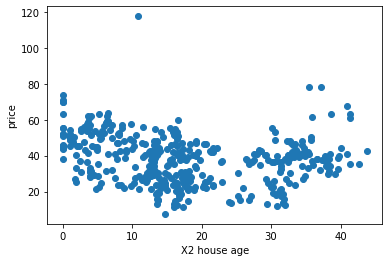

In [6]:
# Daten für house_age und house_prices visuell ausgeben

plt.scatter(house_age, house_prices)
plt.xlabel("X2 house age")
plt.ylabel("price")

# Korrelationskoeffizient für house_age und house_prices ausgeben

print(korrelationskoeffizient(house_age, house_prices))

-0.673612855368918


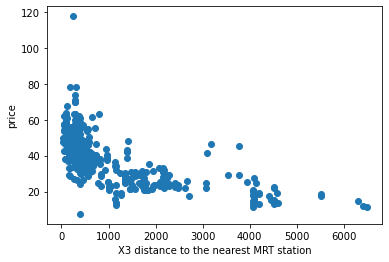

In [7]:
# Daten für distance_mrt_station und house_prices visuell ausgeben

plt.scatter(distance_mrt_station, house_prices)
plt.xlabel("X3 distance to the nearest MRT station")
plt.ylabel("price")

# Korrelationskoeffizient für distance_mrt_station und house_prices ausgeben

print(korrelationskoeffizient(distance_mrt_station, house_prices))

0.5710049111111484


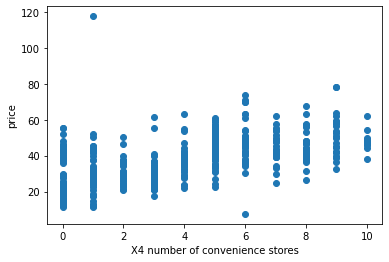

In [8]:
# Daten für number_convenience_stores und house_prices visuell ausgeben

plt.scatter(number_convenience_stores, house_prices)
plt.xlabel("X4 number of convenience stores")
plt.ylabel("price")

# Korrelationskoeffizient für number_convenience_stores und house_prices ausgeben

print(korrelationskoeffizient(number_convenience_stores, house_prices))

# Transformation der Daten

-0.7608650376741359


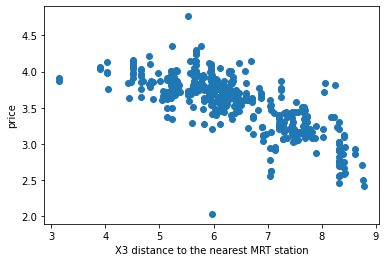

In [9]:
# Korrelationskoeffizient kann durch eine Transformation verbessert werden

distance_mrt_station = np.log(distance_mrt_station)
house_prices = np.log(house_prices)

# Daten für und distance_mrt_station visuell ausgeben

plt.scatter(distance_mrt_station, house_prices)
plt.xlabel("X3 distance to the nearest MRT station")
plt.ylabel("price")

# Korrelationskoeffizient für distance_mrt_station und house_prices ausgeben

print(korrelationskoeffizient(distance_mrt_station, house_prices))

# Optimierung

In [10]:
##################################################################################################################
#
#   Abhängig von der Anzahl optimization_steps werden die funktions_gewichte angepasst, die die Steigung und
#   den Ordinatenabschnitt für die Regressionsgerade bestimmen. Diese Optimierung wird über die Schrittweite,
#   die bei der Initialisierung von GradientDescentOptimizer festgelegt wurde, durchgeführt.
#
#   Alle 2000 Optimierungsschritte wird der momentane Kostenwert ausgegeben.   
#
##################################################################################################################

for step in range(optimization_steps):
    funktions_gewichte = optimization.step(kosten_funktion, funktions_gewichte)
    if step % 2000 == 0:
        print(kosten_funktion(funktions_gewichte))

1.0948718423187995
0.14303265474420865

/home/alllowd/anaconda3/envs/quantum/lib/python3.8/site-packages/pennylane/_grad.py:95: UserWarning: Starting with PennyLane v0.20.0, when using Autograd, inputs have to explicitly specify requires_grad=True (or the argnum argument must be passed) in order for trainable parameters to be identified.
  warnings.warn(



0.07237536278075365
0.06545595220047114
0.06477834000436143


# finale Daten visualisieren

y = -0.26432557189571526 * x + 5.255735291455927


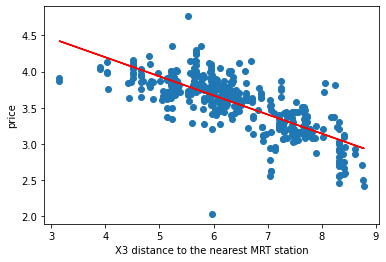

In [11]:
# Daten für und distance_mrt_station visuell ausgeben

plt.scatter(distance_mrt_station, house_prices)
plt.xlabel("X3 distance to the nearest MRT station")
plt.ylabel("price")
plt.plot(distance_mrt_station, house_prices_vorhersage(funktions_gewichte),'r')

# Funktion der ermittelten Regressionsgeraden

print(f"y = {funktions_gewichte[0]} * x + {funktions_gewichte[1]}")